# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [15]:
#it is a magic function that renders the figure in a notebook
%matplotlib inline
import matplotlib.pyplot as plt
#adds a better visual effect to the graphs in this case seaborn, more styles are available
plt.style.use('seaborn')

import pandas as pd
import numpy as np

# importing PCA from sklearn.decomposition in order to analyse the data 
from sklearn.decomposition import PCA 
#use GaussianMixture for Unsupervised clustering
from sklearn.mixture import GaussianMixture

# Get Data

Getting the data using the inhouse created function and package in python

In [2]:
# jupyterworkflow.data is a created package to act as a module, which contains a function that helps with getting the data only if the data is needed and other operations.
from jupyterworkflow.data import get_fremont_data
# the data is assigned to Fremont
Fremont = get_fremont_data()

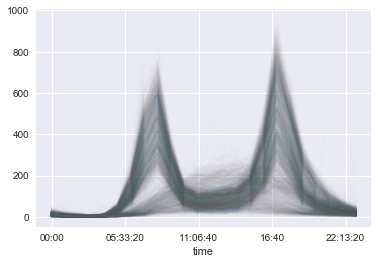

In [3]:
#pivot the Fremont DataFrame where the value total appears and the index.time in fremont plus the columns date and store it in a variable pivoted
pivoted = Fremont.pivot_table('Total', index=Fremont.index.time, columns=Fremont.index.date)
# plot the pivoted data havint the Total value of passings from East and West side and the Time at which they happen
pivoted.plot(legend=False, alpha=0.01);

# Principal Component Analysis

In [4]:
# Pivoted data gets all the na fields filled with 0 and it transposes the the data/matrix/arrays getting all the values from it.
X = pivoted.fillna(0).T.values
# prints the shape of the data which is 2159 crossings in 24 hours
X.shape

(2159, 24)

In [5]:
# Principal component analysis (PCA). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
# run exact full SVD - Singular Value Decomposition calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2159, 2)

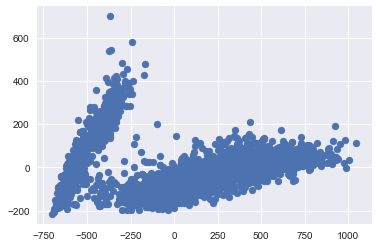

In [6]:
# plot a scatter graph of 0 and 1 grouped values
plt.scatter(X2[:, 0], X2[:, 1])

# Unsupervised Clustering

All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

In [7]:
# Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution.
# fit() method will find the best weights by training the algorithm using the data and labels provided
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

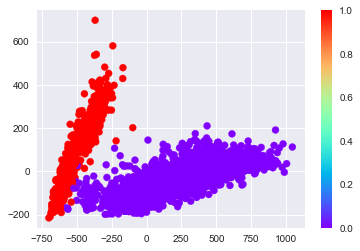

In [8]:
# Adds distinctive colour using c=labels and cmap and also a colour bar.
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

Text(0.5,1,'Red Cluster')

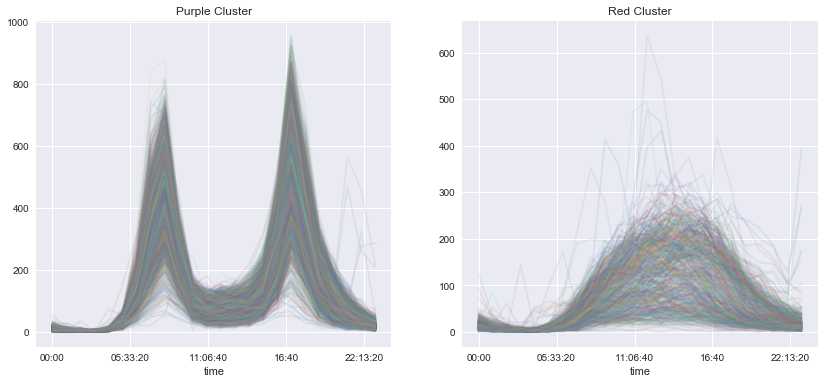

In [9]:
# will put 2 plots in one outcome with subplots 1, 2 and figsize will determine the size of the figures
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#separated the data with label 0 and label 1 into 2 different plots and using alpha will make the lines look better for this instance.
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);
# figure titels
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

# Comparing with Day of Week

In [10]:
# data points separated into days of week
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

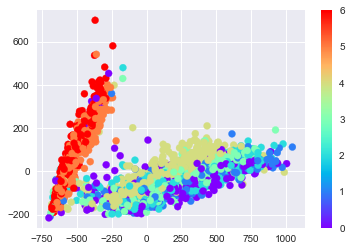

In [11]:
# plotting each day of week for the data using a different colour
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

# Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [12]:
# looking at data to check for outliers
dates =  pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)